In [1]:
import csv
import numpy as np
import pandas as pd
from numpy import array
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import scikitplot as skplt

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from datetime import date
import datetime
import os

In [2]:
# Create folder to save results in
identify = 'ClassificationSKL_ValidationSet4_Undersampled4_56'
folder_name = '/Users/clausholm/Documents/Python/Master_thesis/Data/test_results/'+identify
#os.mkdir(folder_name)

# Load Dataset
# Classification database
df = pd.read_csv('database/ClassificationDataset.csv', sep=';', index_col=0, decimal=',')

df

,1,2,3,4,5,6,7,8,9,10,...,156,157,158,159,160,cluster,Slope28,Slope56,FirstWeek,ArtistPopularity
Adel Tawil - Unsere Lieder,35,33,61,54,146,165,188,199,212,125,...,40,47,21,30,33,2,-1.043956,4.331868,682,63
Alec Benjamin Feat. Alessia Cara - Let Me Down Slowly,2,7,12,13,21,19,15,15,16,13,...,828,833,841,848,817,3,-1.351648,-0.208791,89,81
Andreas Bourani - Auf uns,1,1,3,3,2,31,27,12,29,56,...,594,599,634,567,621,3,2.964835,2.892308,68,56
Annenmaykantereit - Marie,34,57,84,99,119,128,132,140,126,139,...,33,28,29,33,30,2,0.560440,0.881319,653,72
Ariana Grande - 7 rings,231,272,279,302,325,326,372,311,358,356,...,173,154,156,146,159,5,3.496703,0.808791,2107,91
Ava Max - So Am I,82,111,123,97,105,165,308,299,326,304,...,687,713,757,706,774,4,16.145055,15.619780,991,84
Ava Max - Sweet but Psycho,72,158,184,208,188,191,244,204,239,238,...,896,837,830,844,901,4,32.140659,1.907692,1245,84
Bausa - Was Du Liebe nennst,1,3,2,4,8,23,47,50,75,84,...,343,303,313,313,315,5,14.621978,6.428571,88,74
C Arma - Yapma - Radio Edit,2,5,2,0,2,5,3,3,2,8,...,1,1,1,3,1,2,-0.432967,-0.213187,19,57
Calvin Harris & Ragnbone Man - Giant,111,128,196,221,307,378,432,529,423,532,...,655,729,741,688,663,4,25.305495,-1.632967,1773,86


In [1]:
# Split train dataset into input and output days. Change value of input_days
n_steps_in = 56


In [4]:
# define the train data input and output
df2 = df['cluster']
#df_Slope28 = df['Slope28']
#df_Slope56 = df['Slope56']
#df_FirstWeek = df['FirstWeek']
#df_ArtistP = df['ArtistPopularity']

df = df.iloc[:, 0:n_steps_in]

df['cluster'] = df2
#df['Slope28'] = df_Slope28 
#df['Slope56'] = df_Slope56
#df['FirstWeek'] = df_FirstWeek
#df['ArtistPopularity'] = df_ArtistP


df

,1,2,3,4,5,6,7,8,9,10,...,48,49,50,51,52,53,54,55,56,cluster
Adel Tawil - Unsere Lieder,35,33,61,54,146,165,188,199,212,125,...,141,189,225,131,201,186,169,159,265,2
Alec Benjamin Feat. Alessia Cara - Let Me Down Slowly,2,7,12,13,21,19,15,15,16,13,...,55,42,63,45,40,48,43,43,37,3
Andreas Bourani - Auf uns,1,1,3,3,2,31,27,12,29,56,...,183,180,210,150,232,238,228,103,218,3
Annenmaykantereit - Marie,34,57,84,99,119,128,132,140,126,139,...,105,91,98,116,93,111,134,96,125,2
Ariana Grande - 7 rings,231,272,279,302,325,326,372,311,358,356,...,413,459,464,418,463,420,406,456,451,5
Ava Max - So Am I,82,111,123,97,105,165,308,299,326,304,...,892,908,894,876,957,938,949,1036,992,4
Ava Max - Sweet but Psycho,72,158,184,208,188,191,244,204,239,238,...,1115,932,1068,1096,1127,1118,1158,1169,1095,4
Bausa - Was Du Liebe nennst,1,3,2,4,8,23,47,50,75,84,...,436,481,466,482,470,479,543,507,518,5
C Arma - Yapma - Radio Edit,2,5,2,0,2,5,3,3,2,8,...,2,7,11,3,4,7,2,3,6,2
Calvin Harris & Ragnbone Man - Giant,111,128,196,221,307,378,432,529,423,532,...,1199,1205,1252,1221,1188,1219,1179,1201,1152,4


,1,2,3,4,5,6,7,8,9,10,...,48,49,50,51,52,53,54,55,56,cluster
Adel Tawil - Unsere Lieder,35,33,61,54,146,165,188,199,212,125,...,141,189,225,131,201,186,169,159,265,2
Alec Benjamin Feat. Alessia Cara - Let Me Down Slowly,2,7,12,13,21,19,15,15,16,13,...,55,42,63,45,40,48,43,43,37,3
Andreas Bourani - Auf uns,1,1,3,3,2,31,27,12,29,56,...,183,180,210,150,232,238,228,103,218,3
Annenmaykantereit - Marie,34,57,84,99,119,128,132,140,126,139,...,105,91,98,116,93,111,134,96,125,2
Ariana Grande - 7 rings,231,272,279,302,325,326,372,311,358,356,...,413,459,464,418,463,420,406,456,451,5
Ava Max - So Am I,82,111,123,97,105,165,308,299,326,304,...,892,908,894,876,957,938,949,1036,992,4
Ava Max - Sweet but Psycho,72,158,184,208,188,191,244,204,239,238,...,1115,932,1068,1096,1127,1118,1158,1169,1095,4
C Arma - Yapma - Radio Edit,2,5,2,0,2,5,3,3,2,8,...,2,7,11,3,4,7,2,3,6,2
Camila Cabello feat. Young Thug - Havana,74,117,99,143,123,128,126,147,126,153,...,595,594,633,651,633,670,676,656,746,1
Childish Gambino - This Is America,25,51,46,48,37,49,82,78,80,83,...,110,90,95,84,87,87,92,82,82,2


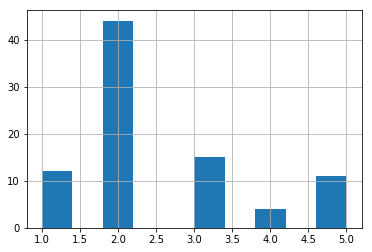

In [5]:

# Split into train and test set 
"""
test_songs = ['Katy Perry - Never Really Over' , 
              'Taylor Swift - You Need To Calm Down', 
              'Shawn Mendes & Camila Cabello - Senorita', 
              'Ava Max - So Am I', 
              'Andreas Bourani - Auf uns', 
              'Meduza feat. Goodboys - Piece Of Your Heart', 
              'Pietro Lombardi - Nur Ein Tanz', 
              'Loud Luxury feat. brando - Body', 
              'Mark Forster - Sowieso', 
              'Camila Cabello feat. Young Thug - Havana',  ] 
"""
test_songs = ['Dotan - Numb' , 
              'The Script - The Last Time', 
              'Mark Ronson feat. Miley Cyrus - Nothing Breaks Like A Heart', 
              'Dynoro & Gigi Dagostino - In My Mind', 
              'Lea - Zu dir', 
              'Marshmello feat. Chvrches - Here With Me', 
              'Kygo & Whitney Houston - Higher Love', 
              'Calvin Harris & Ragnbone Man - Giant', 
              'Bausa - Was Du Liebe nennst', 
              'Lotte & Max Giesinger - Auf das, was da noch kommt',  ]

# create scaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

# Test
test = df.loc[ test_songs , : ]

# Train
train = df.drop(test_songs)

# Show train set
train['cluster'].hist();train.head()

train

,1,2,3,4,5,6,7,8,9,10,...,48,49,50,51,52,53,54,55,56,cluster
Post Malone - Circles,36,44,79,151,141,198,200,242,236,254,...,741,715,725,706,779,730,819,823,868,1
Namika - Je ne parle pas franÃ§ais,39,65,76,93,92,116,143,134,103,174,...,515,486,552,612,580,606,527,598,582,1
Camila Cabello feat. Young Thug - Havana,74,117,99,143,123,128,126,147,126,153,...,595,594,633,651,633,670,676,656,746,1
Max Giesinger - Wenn sie tanzt,28,44,46,52,86,100,217,178,197,141,...,574,537,559,596,498,483,588,471,483,1
Skott - Mermaid,3,9,20,21,28,21,23,20,24,15,...,1,4,3,5,2,3,4,2,2,2


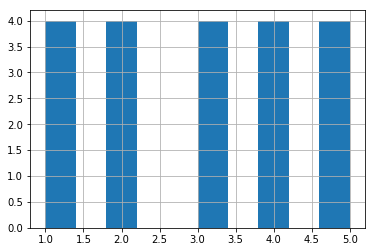

In [6]:
#Randomly select maximum X number of samples
df_1_stars = train.loc[train['cluster'] == 1].sample(n=4,random_state=42)

df_2_stars = train.loc[train['cluster'] == 2].sample(n=4,random_state=42)

df_3_stars = train.loc[train['cluster'] == 3].sample(n=4,random_state=42)

df_4_stars = train.loc[train['cluster'] == 4].sample(n=4,random_state=42)

df_5_stars = train.loc[train['cluster'] == 5].sample(n=4,random_state=42)

# Concatenate both dataframes again
train = pd.concat([df_1_stars, df_2_stars, df_3_stars, df_4_stars, df_5_stars])

train['cluster'].hist();train.head()




In [7]:
# For Train set, use get_dummies to create columns for each stars and show whther there is a value or not (0 or 1)  
train = pd.get_dummies(train, columns = ['cluster'])


,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
Dotan - Numb,43,70,77,81,68,72,79,58,61,63,...,14,13,14,14,6,0,1,0,0,0
The Script - The Last Time,17,23,58,60,16,27,35,55,83,39,...,29,30,36,17,14,0,1,0,0,0
Mark Ronson feat. Miley Cyrus - Nothing Breaks Like A Heart,116,109,81,92,97,148,120,174,208,214,...,935,819,761,848,919,1,0,0,0,0
Dynoro & Gigi Dagostino - In My Mind,36,59,74,70,79,96,106,133,123,126,...,699,693,760,732,776,1,0,0,0,0
Lea - Zu dir,17,33,56,67,72,80,92,90,118,89,...,288,254,258,229,252,0,0,1,0,0
Marshmello feat. Chvrches - Here With Me,48,59,82,106,113,185,101,164,180,135,...,332,362,325,305,267,0,0,1,0,0
Kygo & Whitney Houston - Higher Love,131,170,148,181,196,185,266,321,337,347,...,1027,1105,1041,1067,1073,0,0,0,1,0
Calvin Harris & Ragnbone Man - Giant,111,128,196,221,307,378,432,529,423,532,...,1188,1219,1179,1201,1152,0,0,0,1,0
Bausa - Was Du Liebe nennst,1,3,2,4,8,23,47,50,75,84,...,470,479,543,507,518,0,0,0,0,1
"Lotte & Max Giesinger - Auf das, was da noch kommt",93,111,132,234,185,200,222,231,264,244,...,747,782,795,791,774,0,0,0,0,1


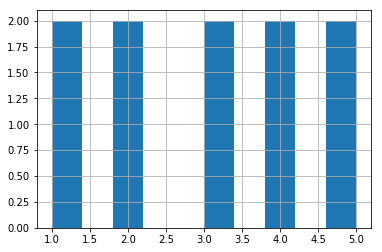

In [8]:
# Show train set
test['cluster'].hist();test.head()

# For Test set, use get_dummies to create columns for each stars and show whther there is a value or not (0 or 1)
test = pd.get_dummies(test, columns = ['cluster'])

test

In [9]:
# prepare configuration for cross validation test harness
seed = 7

max_iter = 10000
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=max_iter)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=1)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)))
models.append(('ET', ExtraTreesClassifier(n_estimators=100, random_state=0)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(probability=True)))
models.append(('MLP', MLPClassifier(alpha=1, max_iter=max_iter, hidden_layer_sizes=1000)))
models.append(('AdaB', AdaBoostClassifier()))     
models.append(('GP', GaussianProcessClassifier(1.0 * RBF(1.0))))
models.append(('QD', QuadraticDiscriminantAnalysis()))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

CV score for class cluster_1 is 0.8015873015873015
CV score for class cluster_2 is 0.8968253968253969
CV score for class cluster_3 is 0.8015873015873015
CV score for class cluster_4 is 1.0
CV score for class cluster_5 is 0.6269841269841271

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         2
           3       0.50      0.50      0.50         2
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         2

    accuracy                           0.70        10
   macro avg       0.63      0.70      0.66       

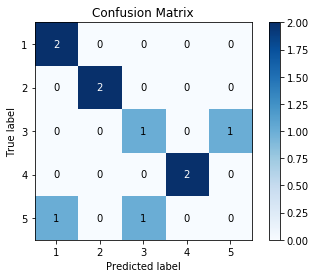

------------------------------------------------------------
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

CV score for class cluster_1 is 0.6428571428571428
CV score for class cluster_2 is 0.7857142857142857
CV score for class cluster_3 is 0.6428571428571428
CV score for class cluster_4 is 0.753968253968254
CV score for class cluster_5 is 0.5952380952380952

              precision    recall  f1-score   support

           1       0.40      1.00      0.57         2
           2       0.33      0.50      0.40         2
           3       0.50      0.50      0.50         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2

    accuracy                           0.40        10
   macro avg       0.25      0.40      0.29        10
weighted avg       0.25      0.40      0.29        10


True Cluster      [2, 2, 1, 1, 3, 3, 4, 4

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


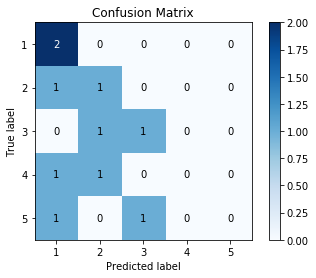

------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

CV score for class cluster_1 is 0.6349206349206349
CV score for class cluster_2 is 0.8968253968253969
CV score for class cluster_3 is 0.9523809523809524
CV score for class cluster_4 is 1.0
CV score for class cluster_5 is 0.7063492063492064

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         2

    accuracy                           0.80        10
   macro avg       0.70      0.80      0.73        10
weighted avg       0.70      0.80      0.73        10


True Cluster      [2

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


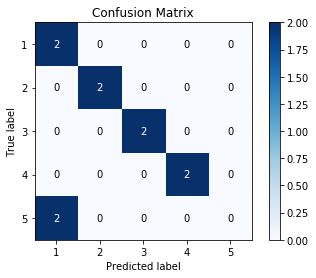

------------------------------------------------------------
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

CV score for class cluster_1 is 0.7936507936507936
CV score for class cluster_2 is 0.9523809523809524
CV score for class cluster_3 is 0.8968253968253969
CV score for class cluster_4 is 0.9523809523809524
CV score for class cluster_5 is 0.626984126984127

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         2
           4       1.00      1.00      

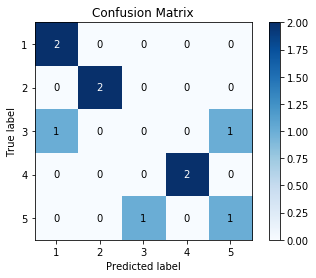

------------------------------------------------------------
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

CV score for class cluster_1 is 0.6349206349206349
CV score for class cluster_2 is 0.8968253968253969
CV score for class cluster_3 is 0.9047619047619048
CV score for class cluster_4 is 0.9523809523809524
CV score for class cluster_5 is 0.49206349206349204

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       1.00      1.00 

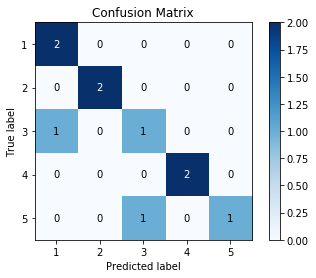

------------------------------------------------------------
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

CV score for class cluster_1 is 0.7301587301587302
CV score for class cluster_2 is 0.8968253968253969
CV score for class cluster_3 is 0.9523809523809524
CV score for class cluster_4 is 1.0
CV score for class cluster_5 is 0.5952380952380952

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         2
           2       1.00      0.50      0.67         2
     

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


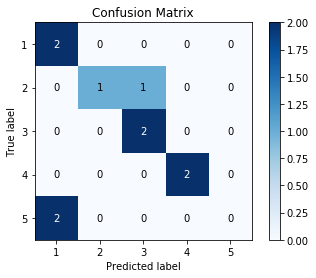

------------------------------------------------------------
GaussianNB(priors=None, var_smoothing=1e-09)

CV score for class cluster_1 is 0.7936507936507936
CV score for class cluster_2 is 0.8492063492063493
CV score for class cluster_3 is 0.753968253968254
CV score for class cluster_4 is 0.9523809523809524
CV score for class cluster_5 is 0.8095238095238096

              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       1.00      0.50      0.67         2
           3       0.50      0.50      0.50         2
           4       0.67      1.00      0.80         2
           5       1.00      0.50      0.67         2

    accuracy                           0.70        10
   macro avg       0.77      0.70      0.69        10
weighted avg       0.77      0.70      0.69        10


True Cluster      [2, 2, 1, 1, 3, 3, 4, 4, 5, 5]

Predicted Cluster [2, 3, 1, 1, 3, 1, 4, 4, 5, 4]


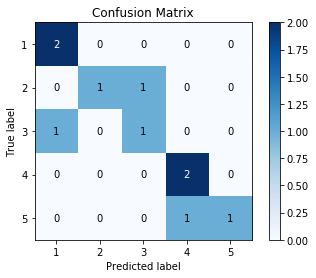

------------------------------------------------------------
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

CV score for class cluster_1 is 0.6349206349206349
CV score for class cluster_2 is 0.8015873015873015
CV score for class cluster_3 is 0.8015873015873015
CV score for class cluster_4 is 0.9523809523809524
CV score for class cluster_5 is 0.7063492063492064

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         2

    accuracy                           0.40        10
   macro avg       0.40      0.40      0.40        10

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


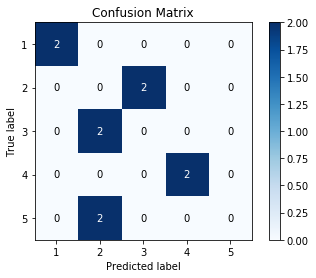

------------------------------------------------------------
MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=1000, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

CV score for class cluster_1 is 0.7380952380952381
CV score for class cluster_2 is 0.8015873015873015
CV score for class cluster_3 is 0.8015873015873015
CV score for class cluster_4 is 0.3888888888888889
CV score for class cluster_5 is 0.5317460317460317

              precision    recall  f1-score   support

           1       0.40      1.00      0.57         2
           2       0.00      0.00      0.00         

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


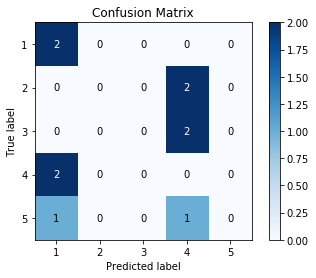

------------------------------------------------------------
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

CV score for class cluster_1 is 0.7301587301587302
CV score for class cluster_2 is 0.8968253968253969
CV score for class cluster_3 is 0.9444444444444445
CV score for class cluster_4 is 0.9523809523809524
CV score for class cluster_5 is 0.48412698412698413

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       0.50      0.50      0.50         2
           4       0.67      1.00      0.80         2
           5       0.00      0.00      0.00         2

    accuracy                           0.70        10
   macro avg       0.63      0.70      0.66        10
weighted avg       0.63      0.70      0.66        10


True Cluster      [2, 2, 1, 1, 3, 3, 4, 4, 5, 5]

Predic

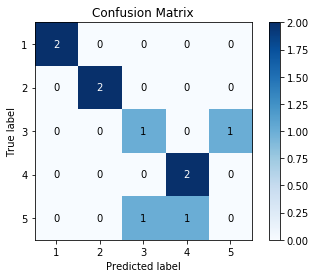

------------------------------------------------------------
GaussianProcessClassifier(copy_X_train=True, kernel=1**2 * RBF(length_scale=1),
                          max_iter_predict=100, multi_class='one_vs_rest',
                          n_jobs=None, n_restarts_optimizer=0,
                          optimizer='fmin_l_bfgs_b', random_state=None,
                          warm_start=False)

CV score for class cluster_1 is 0.8015873015873015
CV score for class cluster_2 is 0.8015873015873015
CV score for class cluster_3 is 0.8015873015873015
CV score for class cluster_4 is 0.8015873015873015
CV score for class cluster_5 is 0.8015873015873015

              precision    recall  f1-score   support

           1       0.20      1.00      0.33         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2

    accuracy          

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


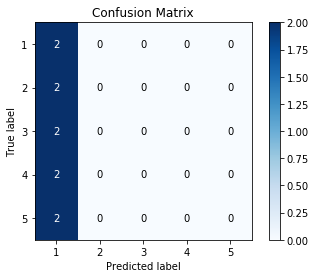

------------------------------------------------------------
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

CV score for class cluster_1 is 0.6428571428571428
CV score for class cluster_2 is 0.8968253968253969
CV score for class cluster_3 is 0.7857142857142857
CV score for class cluster_4 is 0.5952380952380952
CV score for class cluster_5 is 0.6507936507936507

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       0.25      1.00      0.40         2
           5       0.00      0.00      0.00         2

    accuracy                           0.20        10
   macro avg       0.05      0.20      0.08        10
weighted avg       0.05      0.20      0.08        10


True Cluster      [2, 2, 1, 1, 3, 3, 4, 4, 5, 5]

Predicted Cluster 

/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/clausholm/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  war

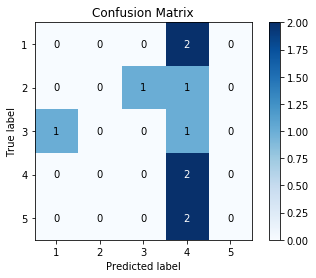

------------------------------------------------------------


,f1-score,precision,recall,support,model,True Cluster,Predicted Cluster
1,0.800000,0.666667,1.0,2.0,"LogisticRegression(C=1.0, class_weight=None, d...","[2, 2, 1, 1, 3, 3, 4, 4, 5, 5]","[2, 2, 1, 1, 5, 3, 4, 4, 3, 1]"
2,1.000000,1.000000,1.0,2.0,"LogisticRegression(C=1.0, class_weight=None, d...","[2, 2, 1, 1, 3, 3, 4, 4, 5, 5]","[2, 2, 1, 1, 5, 3, 4, 4, 3, 1]"
3,0.500000,0.500000,0.5,2.0,"LogisticRegression(C=1.0, class_weight=None, d...","[2, 2, 1, 1, 3, 3, 4, 4, 5, 5]","[2, 2, 1, 1, 5, 3, 4, 4, 3, 1]"
4,1.000000,1.000000,1.0,2.0,"LogisticRegression(C=1.0, class_weight=None, d...","[2, 2, 1, 1, 3, 3, 4, 4, 5, 5]","[2, 2, 1, 1, 5, 3, 4, 4, 3, 1]"
5,0.000000,0.000000,0.0,2.0,"LogisticRegression(C=1.0, class_weight=None, d...","[2, 2, 1, 1, 3, 3, 4, 4, 5, 5]","[2, 2, 1, 1, 5, 3, 4, 4, 3, 1]"
accuracy,0.700000,0.700000,0.7,0.7,"LogisticRegression(C=1.0, class_weight=None, d...","[2, 2, 1, 1, 3, 3, 4, 4, 5, 5]","[2, 2, 1, 1, 5, 3, 4, 4, 3, 1]"
macro avg,0.660000,0.633333,0.7,10.0,"LogisticRegression(C=1.0, class_weight=None, d...","[2, 2, 1, 1, 3, 3, 4, 4, 5, 5]","[2, 2, 1, 1, 5, 3, 4, 4, 3, 1]"
weighted avg,0.660000,0.633333,0.7,10.0,"LogisticRegression(C=1.0, class_weight=None, d...","[2, 2, 1, 1, 3, 3, 4, 4, 5, 5]","[2, 2, 1, 1, 5, 3, 4, 4, 3, 1]"
1,0.571429,0.400000,1.0,2.0,"LinearDiscriminantAnalysis(n_components=None, ...","[2, 2, 1, 1, 3, 3, 4, 4, 5, 5]","[2, 1, 1, 1, 2, 3, 1, 2, 3, 1]"
2,0.400000,0.333333,0.5,2.0,"LinearDiscriminantAnalysis(n_components=None, ...","[2, 2, 1, 1, 3, 3, 4, 4, 5, 5]","[2, 1, 1, 1, 2, 3, 1, 2, 3, 1]"


In [10]:
class_names = ['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5']
scores = []
preds = np.zeros((len(test), len(class_names)))

train_values = train.drop(columns=['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5'])
test_values = test.drop(columns=['cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'cluster_5'])

# fit scaler on data
#train_values = scaler.fit_transform(train_values)
#test_values = scaler.fit_transform(test_values)

dfFinal = pd.DataFrame()

for name, model in models:
    print(model)
    print('')
    
    for i, class_name in enumerate(class_names):
        train_target = train[class_name]    
        cv_score = np.mean(cross_val_score(estimator = model, X = train_values, 
                                          y = train_target, cv = 3, scoring = 'accuracy'))
        scores.append(cv_score)
        print('CV score for class {} is {}'.format(class_name, cv_score))
        model.fit(train_values, train_target)
        preds[:,i] = model.predict_proba(test_values)[:,1]
    print('')
    
    test_clusters = [x + 1 for x in np.argmax(test[class_names].values, axis = 1)] 
    pred_clusters = [x + 1 for x in np.argmax(preds, axis = 1)] 
    
    t = metrics.classification_report(test_clusters, pred_clusters)
    print(t) 
    print('')
    
    print('True Cluster     ', test_clusters)
    print('')
    print('Predicted Cluster', pred_clusters)
    # Plot non-normalized confusion matrix
    skplt.metrics.plot_confusion_matrix(test_clusters, pred_clusters, normalize=False)
    plt.savefig(folder_name+'/'+ str(name) + '_' + identify + '.png')
    plt.show()
    
    print('------------------------------------------------------------')
    
    # Return classification report as dictionary for saving
    report = metrics.classification_report(test_clusters, pred_clusters, output_dict=True)

    # create dataframe from classification dictionary
    df3 = pd.DataFrame(report).transpose()
    
    # Setup dataframe to be saved
    df3['model'] = str(model)
    df3['True Cluster'] = str(test_clusters)
    df3['Predicted Cluster'] = str(pred_clusters)
    dfFinal = dfFinal.append(df3, sort=False)
    
    #new_row = {'f1-score':'-', 'precision':'-', 'recall':'-', 'support':'-', 'model':'-', 'True Cluster':'-', 'Predicted Cluster':'-'}
    #s = pd.Series(new_row, name='-')
    #append row to the dataframe
    #dfFinal = dfFinal.append(s)

# Create datetime for time of results  
now = datetime.datetime.now()
now = str(now.strftime("%Y-%m-%d %H:%M:%S"))

# Save Results to csv file in folder
#dfFinal.to_csv(folder_name+'/'+identify+'_'+now+'.csv', sep=';', decimal=',' )
    
dfFinal

In [11]:
train_target

Post Malone - Circles                                    0
Namika - Je ne parle pas franÃ§ais                       0
Camila Cabello feat. Young Thug - Havana                 0
Max Giesinger - Wenn sie tanzt                           0
Skott - Mermaid                                          0
Mitski - Geyser                                          0
Moses Sumney - Title Of This Song                        0
Shirin David - Fliegst Du mit                            0
Namika - Lieblingsmensch                                 0
Philipp Dittberner - Das ist dein Leben                  0
Alec Benjamin Feat. Alessia Cara - Let Me Down Slowly    0
Sarah Connor - Wie schÃ¶n du bist                        0
Ava Max - Sweet but Psycho                               0
Tones And I - Dance Monkey                               0
Ava Max - So Am I                                        0
Shawn Mendes & Camila Cabello - Senorita                 0
Sam Smith - How Do You Sleep?                           

Feature ranking:
1. feature 25 (0.050679)
2. feature 5 (0.042207)
3. feature 26 (0.037592)
4. feature 52 (0.037234)
5. feature 48 (0.035953)
6. feature 55 (0.032595)
7. feature 49 (0.031552)
8. feature 50 (0.029599)
9. feature 53 (0.027620)
10. feature 38 (0.027433)
11. feature 28 (0.027180)
12. feature 9 (0.027089)
13. feature 37 (0.027086)
14. feature 54 (0.026705)
15. feature 34 (0.024799)
16. feature 33 (0.023950)
17. feature 24 (0.020729)
18. feature 46 (0.019686)
19. feature 7 (0.019346)
20. feature 45 (0.019196)
21. feature 1 (0.018932)
22. feature 20 (0.018578)
23. feature 32 (0.018424)
24. feature 22 (0.017954)
25. feature 29 (0.017404)
26. feature 2 (0.016747)
27. feature 42 (0.015600)
28. feature 40 (0.015380)
29. feature 44 (0.015312)
30. feature 30 (0.015079)
31. feature 41 (0.015001)
32. feature 14 (0.013941)
33. feature 36 (0.013760)
34. feature 10 (0.012883)
35. feature 19 (0.012171)
36. feature 13 (0.012068)
37. feature 47 (0.012061)
38. feature 16 (0.011563)
39. featu

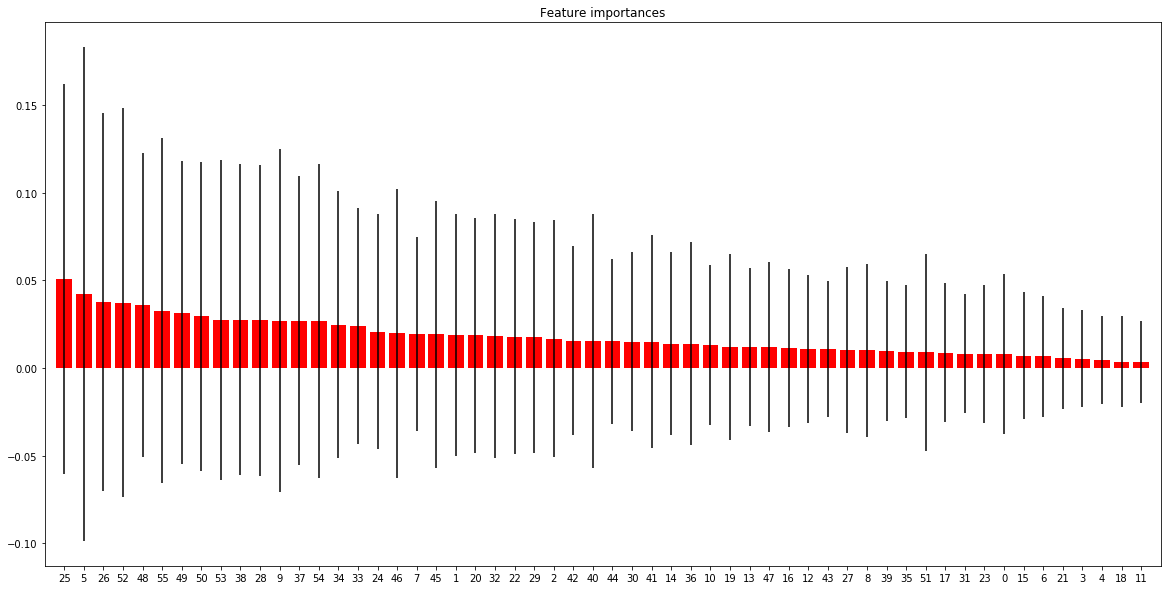

In [12]:
# Set classifier to use for feature importance calculation
model = ExtraTreesClassifier(n_estimators=100, random_state=0)

model.fit(train_values, train_target)
importances = model.feature_importances_

std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_values.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(train_values.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(train_values.shape[1]), indices)
plt.xlim([-1, train_values.shape[1]])
plt.show()

In [13]:
train_values

,1,2,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
Post Malone - Circles,36,44,79,151,141,198,200,242,236,254,...,666,741,715,725,706,779,730,819,823,868
Namika - Je ne parle pas franÃ§ais,39,65,76,93,92,116,143,134,103,174,...,522,515,486,552,612,580,606,527,598,582
Camila Cabello feat. Young Thug - Havana,74,117,99,143,123,128,126,147,126,153,...,607,595,594,633,651,633,670,676,656,746
Max Giesinger - Wenn sie tanzt,28,44,46,52,86,100,217,178,197,141,...,479,574,537,559,596,498,483,588,471,483
Skott - Mermaid,3,9,20,21,28,21,23,20,24,15,...,3,1,4,3,5,2,3,4,2,2
Mitski - Geyser,2,3,3,5,4,6,8,7,6,9,...,6,5,2,6,3,3,3,5,2,2
Moses Sumney - Title Of This Song,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Shirin David - Fliegst Du mit,22,37,37,40,44,37,38,27,33,41,...,19,21,13,15,14,14,16,14,15,13
Namika - Lieblingsmensch,1,0,0,1,9,12,12,17,24,21,...,150,142,161,156,150,155,150,213,186,201
Philipp Dittberner - Das ist dein Leben,7,12,13,16,26,26,37,57,65,48,...,204,284,171,304,301,291,339,252,281,288
